# School Matcher Graph

This notebook explores creating a LangGraph for the SchoolMatch AI project.

## 1. Setup and Imports


In [1]:
# Import necessary libraries

import enum
import os
from dotenv import load_dotenv

load_dotenv()

from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END, Graph
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict

from langchain_app.merger_analyzer import (
    create_merger_feature_extractor,
    create_compatibility_analyzer,
    create_merger_recommendation_formatter,
    create_final_recommender
)
from langchain_app.school_matcher_graph import create_school_matcher_graph, run_school_matcher
from db.college_vector_store import CollegeVectorStore

In [2]:
## langsmith tracing
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch-ai"

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

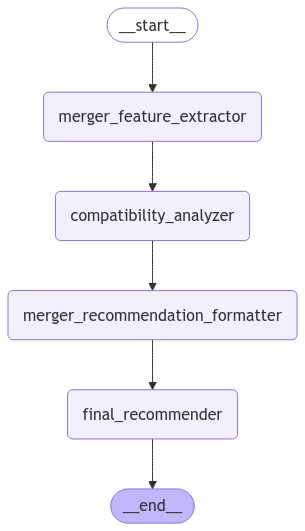

In [4]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [5]:
# Run the graph with Seattle University
result = run_school_matcher(graph, "Seattle University")

# Print all analyses first
for analysis in result["compatibility_analyses"]:
    print(f"\nPartner: {analysis['partner']}")
    print(analysis["analysis"])

# Print the final recommendation
print("\nFinal Recommendation:")
print(result["final_recommendation"])


Partner: University of Washington
1. Score: 75/100

2. Key Synergies:
   - Location: Both institutions are located in Seattle, which could facilitate collaboration and sharing of resources.
   - Academic Programs: Both universities offer a wide range of undergraduate, graduate, and professional degree programs. There could be potential for collaboration or cross-registration in areas of shared strength, such as Business, Law, and Nursing.
   - Values: Both institutions have a strong commitment to social justice, diversity, and community engagement, which could form the basis for joint initiatives or programs.

3. Challenges:
   - Size and Scope: The University of Washington is a much larger institution, with over 45,000 students. This could lead to challenges in aligning processes and resources.
   - Type: Seattle University is a private, Jesuit institution, while the University of Washington is a public university. This could lead to differences in governance, funding, and mission.
 